# Vocabulary Definition

## 1. Importing our reviews dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from textblob import TextBlob
from textblob.en.taggers import PatternTagger
import numpy as np
from sklearn import metrics

In [2]:
dataset = pd.read_csv("data/Performance_Dataset.csv")
dataset.head()

,review,sentiment
0,"fast write and read performance, and deliverin...",1
1,delivers higher performance under heavy workloads,1
2,presented relatively good performance in INSER...,1
3,performance in READ-and-UPDATE was better than...,1
4,probably showed poor performance because the l...,0


## 2. Converting the reviews in a text file in order to use nltk

In [3]:
reviews = dataset['review']
text = ""
for review in reviews:
    text += review 
    text += '\n'

## 3. Getting all the words

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

## 4. Finding Bigrams, Trigrams and Collocations

In [5]:
bigram_measeures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(words)
trigram_finder = TrigramCollocationFinder.from_words(words)

### 4.1 Remove stopwords

In [6]:
ignored_words = stopwords.words('english')

### 4.2 Apply a filter to search common bigrams with 3 ocurrences as minimum

In [7]:
bigram_finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
bigram_finder.apply_freq_filter(3)
bigram_finder.nbest(bigram_measeures.pmi, 10)

[('feature', 'rich'),
 ('horizontal', 'scaling'),
 ('ACID', 'compliance'),
 ('aggregation', 'framework'),
 ('map', 'reduce'),
 ('per', 'second'),
 ('schema', 'design'),
 ('without', 'compromising'),
 ('primary', 'key'),
 ('key', 'value')]

### 4.3 Apply a filter to search common trigrams with 3 ocurrences as minimum

In [8]:
trigram_finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
sorted(trigram_finder.nbest(trigram_measures.raw_freq, 10))

[('Full', 'index', 'support'),
 ('automatically', 'partitions', 'data'),
 ('data', 'across', 'servers'),
 ('feature', 'rich', 'NoSQL'),
 ('global', 'JavaScript', 'lock'),
 ('key', 'value', 'stores'),
 ('large', 'data', 'sets'),
 ('master', 'master', 'replication'),
 ('partitions', 'data', 'across'),
 ('performance', 'supports', 'sharding')]

## 5. Get the most common words in the text

### 5.1 Words that commonly appear together in the text

In [9]:
reviews_words = [w for w in words if len(w) > 3 and w.lower() not in ignored_words]
review_text = nltk.Text(reviews_words)
review_text.collocations()

high performance; NoSQL database; real time; feature rich; read write;
orders magnitude; horizontal scaling; ACID compliance; aggregation
framework; single threaded; Queries sources; STREAM step; asynchronous
call; forms backbone; without compromising; times faster; poor
performance; reading writing; schema design; data loss


### 5.2 More Frequent Words

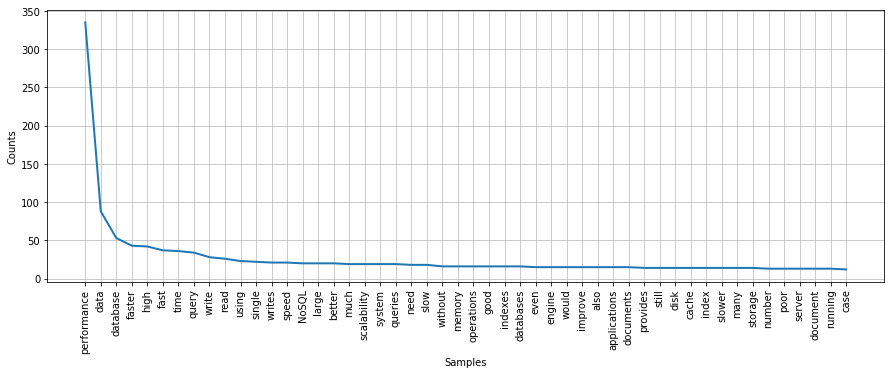

In [10]:
fdist_reviews = FreqDist(review_text)
plt.figure(figsize=(15,5))
fdist_reviews.plot(50)

### 5.3 The most common words

In [11]:
fdist_reviews.most_common(20)

[('performance', 335),
 ('data', 88),
 ('database', 53),
 ('faster', 43),
 ('high', 42),
 ('fast', 37),
 ('time', 36),
 ('query', 34),
 ('write', 28),
 ('read', 26),
 ('using', 23),
 ('single', 22),
 ('writes', 21),
 ('speed', 21),
 ('NoSQL', 20),
 ('large', 20),
 ('better', 20),
 ('much', 19),
 ('scalability', 19),
 ('system', 19)]

## 6. Words that appear most commonly in positive reviews

### 6.1 Create a text for positive and negative reviews

In [12]:
pos_reviews = dataset.review[dataset['sentiment'] == 1]
pos_reviews_text = ""
for review in pos_reviews:
    pos_reviews_text += review
    pos_reviews_text += '\n'
    
pos_words = tokenizer.tokenize(pos_reviews_text)
pos_words = [w for w in pos_words if len(w) > 3 and w.lower() not in ignored_words]
text_pos = nltk.Text(pos_words)

In [13]:
neg_reviews = dataset.review[dataset['sentiment'] == 0]
neg_reviews_text = ""
for review in neg_reviews:
    neg_reviews_text += review
    neg_reviews_text += '\n'
    
neg_words = tokenizer.tokenize(neg_reviews_text)
neg_words = [w for w in neg_words if len(w) > 3 and w.lower() not in ignored_words]
text_neg = nltk.Text(neg_words)

### 6.2 See the collocations for both reviews

In [14]:
print("======== Collocations in positive reviews ========")
print(text_pos.collocations())
print("-" * 60)
print("======== Collocations in negative reviews ========")
print(text_neg.collocations())

======== Collocations in positive reviews ========
high performance; NoSQL database; ACID compliance; orders magnitude;
forms backbone; monitoring tools; without compromising; highly
scalable; READ UPDATE; automatically partitions; extremely functional;
feature rich; reading writing; across servers; servers increased;
times faster; possible without; read write; lock free; sharding
automatically
None
------------------------------------------------------------
======== Collocations in negative reviews ========
single threaded; real time; amounts data; poor performance; schema
design; performance issues; Queries sources; STREAM step; asynchronous
call; horizontal scaling; sources predictable; comes cost; write
throughput; large amounts; NoSQL database; array type; configure
durability; means asynchronous; virtualized environments; aggregation
framework
None


### 6.3 See general common words 

In [15]:
def plot_common_words(words, useless_words=[], num=50):
    meaningul_words = [w for w in words if w.lower() not in useless_words]
    meaning_text = nltk.Text(meaningul_words)
    fdist = FreqDist(meaning_text)
    plt.figure(figsize=(15,5))
    fdist.plot(num)
    return fdist

#### 6.3.1 Positive Reviews

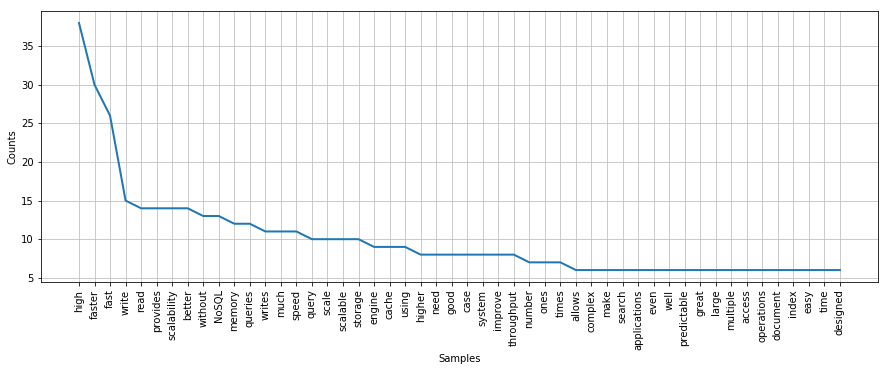

In [16]:
useless_words = ['performance', 'data', 'database']
pos_meaningul_words = [w for w in pos_words if w.lower() not in useless_words]
fdis_pos = plot_common_words(pos_meaningul_words, useless_words)

#### 6.3.2 Negative Reviews

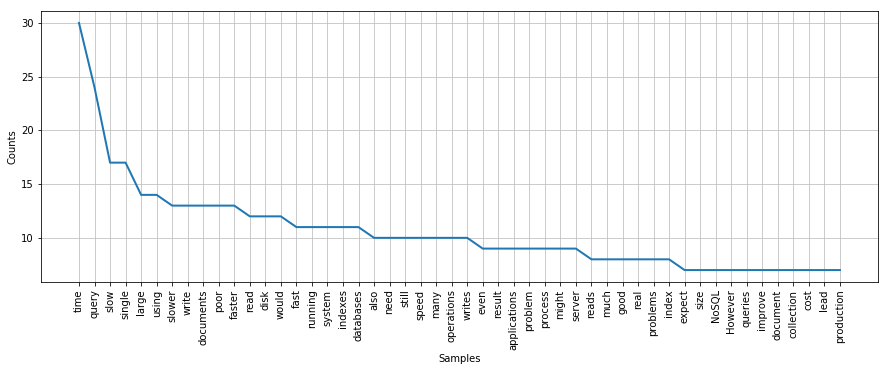

In [17]:
useless_words = ['performance', 'data', 'database']
neg_meaningul_words = [w for w in neg_words if w.lower() not in useless_words]
fdist_neg = plot_common_words(neg_meaningul_words, useless_words)

### 6.4 See the common Nouns

In [18]:
def get_words_from_tag(text, desired_tag):
    tags = TextBlob(text).tags
    words = []
    for word, tag in tags:
        if tag == desired_tag:
            words.append(word)
    return words

#### 6.4.1 Positive Words

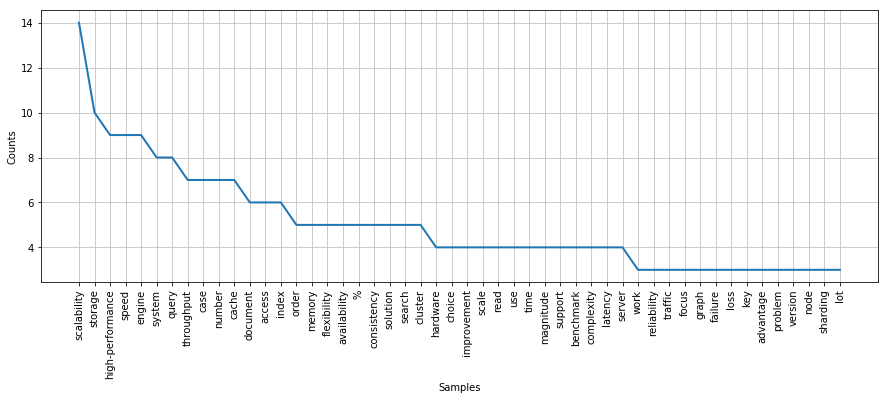

In [19]:
pos_nn = get_words_from_tag(pos_reviews_text, 'NN')
fdist_nn_pos = plot_common_words(pos_nn, useless_words)

#### 6.4.2 Negative Words

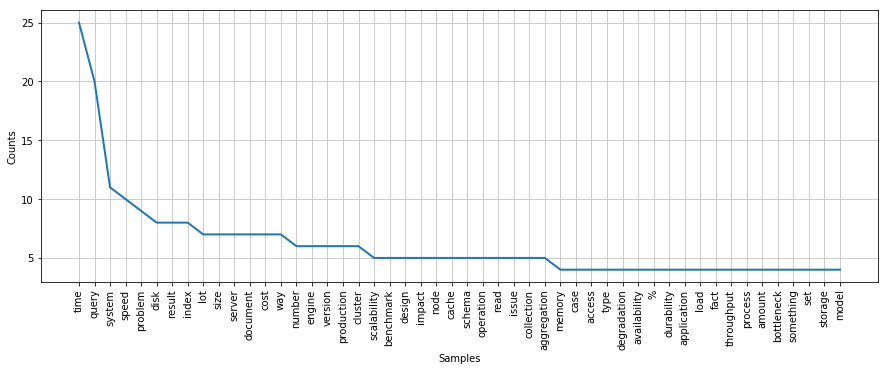

In [20]:
neg_nn = get_words_from_tag(neg_reviews_text, 'NN')
fdist_nn_neg = plot_common_words(neg_nn, useless_words)

#### 6.4.3 Nouns that appear in both doesn't affect the general sentiment

In [21]:
def get_sets(fdist1, fdist2):
    set1 = set([word for word, count in fdist1])
    set2 = set([word for word, count in fdist2])
    return set1, set2                

In [22]:
common_pos_nn = fdist_nn_pos.most_common(100)
common_neg_nn = fdist_nn_neg.most_common(100)
set_pos_nn, set_neg_nn = get_sets(common_pos_nn, common_neg_nn)        

In [23]:
all_nn = set_neg_nn | set_pos_nn

In [24]:
words = []
pos = []
neg = []
total_count = []
for word in all_nn:
    pos_count = fdist_nn_pos[word]
    neg_count = fdist_nn_neg[word]
    total = pos_count + neg_count
    words.append(word)
    pos.append(pos_count)
    neg.append(neg_count)
    total_count.append(total)


#### 6.4.4 Graph all the nouns and their sentiment

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='maritza05', api_key='K4Vg9zpf86kxIKvfGT5D')

trace1 = go.Bar(
    y=words,
    x=neg,
    name='Negative',
    orientation = 'h',
    marker = dict(
        color = '#FA6B5B',
        line = dict(
            color = '#FA6B5B',
            width = 1)
    )
)
trace2 = go.Bar(
    y=words,
    x=pos,
    name='Positive',
    orientation = 'h',
    marker = dict(
        color = '#28D8B2',
        line = dict(
            color = '#28D8B2',
            width = 1)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    autosize=False,
    width=900,
    height=1500,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')


#### 6.4.5 Display the words as sets, this way we can make operations like find the intersection of both sets

In [26]:
from IPython.display import HTML, display

def chunkify(lst,n):
    return [ lst[i::n] for i in range(n) ]

def print_table(data):
    display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

##### 6.4.5.1 Set of Negative Nouns

In [27]:
only_neg = set_neg_nn - set_pos_nn
print_table(chunkify(list(only_neg), 5))

##### 6.4.5.2 Set of Positive Nouns

In [28]:
only_pos = set_pos_nn - set_neg_nn
print_table(chunkify(list(only_pos), 7))

##### 6.4.5.3 Intersection

In [29]:
both = set_pos_nn & set_neg_nn
print_table(chunkify(list(both), 5))

In [30]:
def find_review_by_word(dataset, word, sentiment=None):
    if sentiment is None:
        reviews = dataset.review[dataset['review'].str.contains(word)]
    else:
        condition = dataset['sentiment'] == sentiment
        reviews = dataset.review[dataset['review'].str.contains(word) & condition]
    
    print_table(chunkify(reviews, len(reviews)))
        

In [31]:
find_review_by_word(dataset, 'latency', 0)

You may see the effects of disk latency multiplied.
"However this does not mean that Redis is slow in virtualized environments, the delivered performances are still very good and most of the serious performance issues you may incur in virtualized environments are due to over-provisioning, non-local disks with high latency, or old hypervisor software that have slow fork syscall implementation."


In [32]:
sentence = "demonstrated superior performance over other NoSQL databases when it comes to throughput and latency across multiple configurations."
TextBlob(sentence).tags

[('demonstrated', 'VBN'),
 ('superior', 'JJ'),
 ('performance', 'NN'),
 ('over', 'IN'),
 ('other', 'JJ'),
 ('NoSQL', 'NNP'),
 ('databases', 'NNS'),
 ('when', 'WRB'),
 ('it', 'PRP'),
 ('comes', 'VBZ'),
 ('to', 'TO'),
 ('throughput', 'VB'),
 ('and', 'CC'),
 ('latency', 'VB'),
 ('across', 'IN'),
 ('multiple', 'JJ'),
 ('configurations', 'NNS')]

### 6.5 See the common Adjectives

#### 6.5.1 Common Adjectives for positive reviews

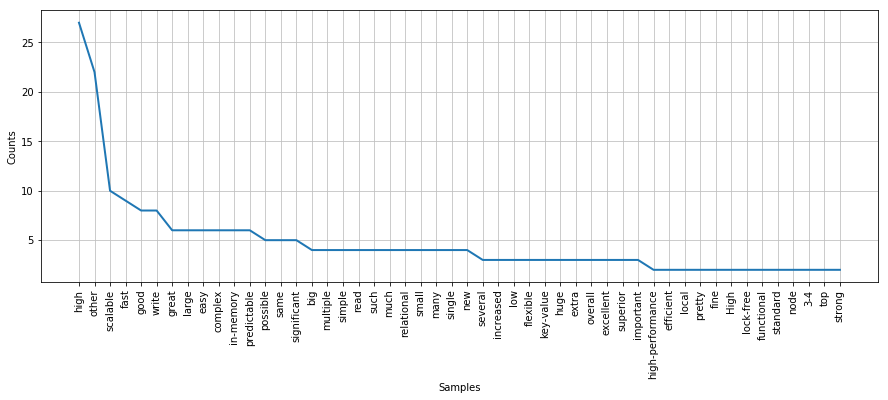

In [33]:
pos_jj = get_words_from_tag(pos_reviews_text, 'JJ')
fdist_jj_pos = plot_common_words(pos_jj, useless_words)

#### 6.5.2 Common Adjectives for negative reviews

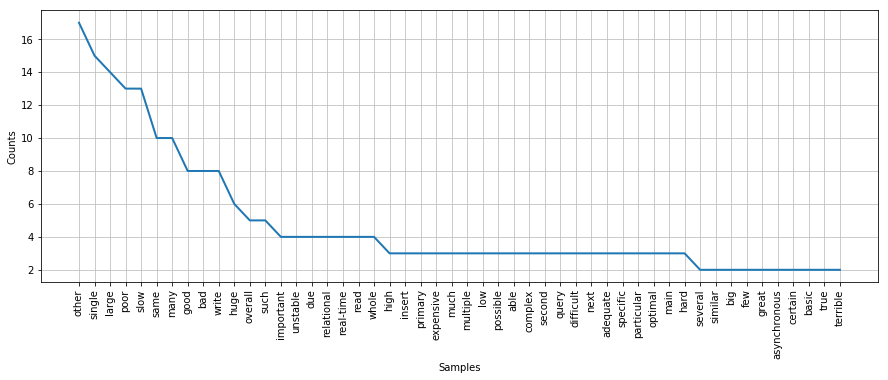

In [34]:
neg_jj = get_words_from_tag(neg_reviews_text, 'JJ')
fdist_jj_neg = plot_common_words(neg_jj, useless_words)

### 6.6 See the common Adverbs

#### 6.6.1 Common Adjectives for positive reviews

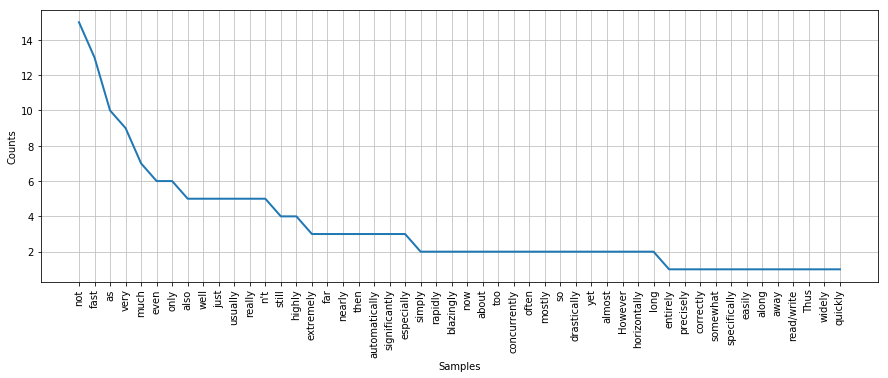

In [35]:
pos_rb = get_words_from_tag(pos_reviews_text, 'RB')
fdist_rb_pos = plot_common_words(pos_rb, useless_words)

#### 6.6.2 Common Adjectives for negative reviews

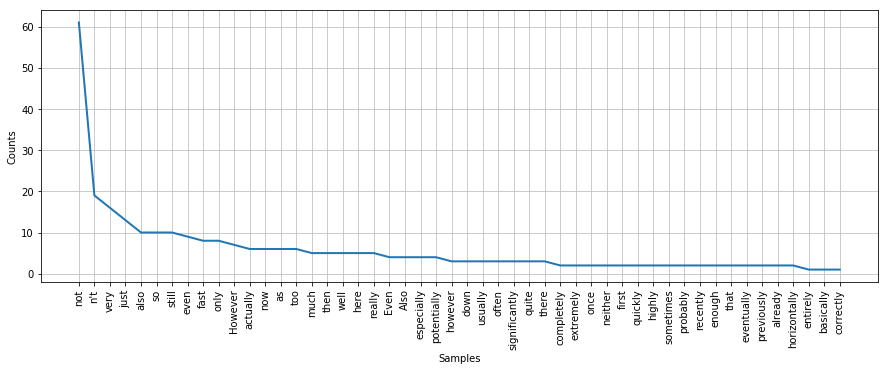

In [36]:
neg_rb = get_words_from_tag(neg_reviews_text, 'RB')
fdist_rb_neg = plot_common_words(neg_rb, useless_words)

### 6.7 See the common Adverbs

#### 6.7.1 Common Adjectives for positive reviews

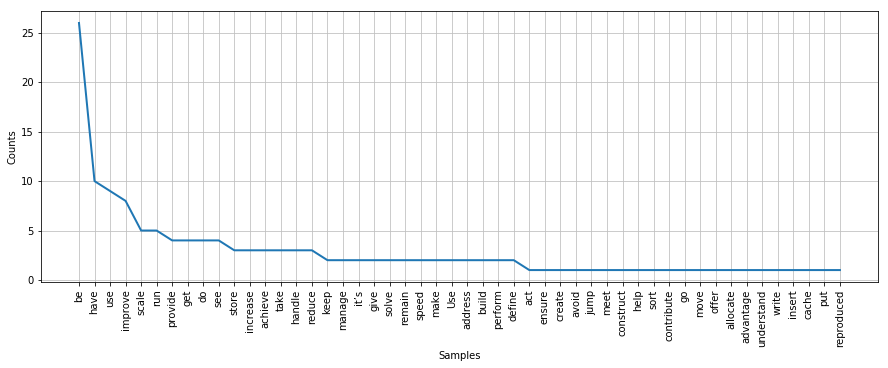

In [37]:
pos_vb = get_words_from_tag(pos_reviews_text, 'VB')
fdist_vb_pos = plot_common_words(pos_vb, useless_words)

#### 6.7.2 Common Adjectives for negative reviews

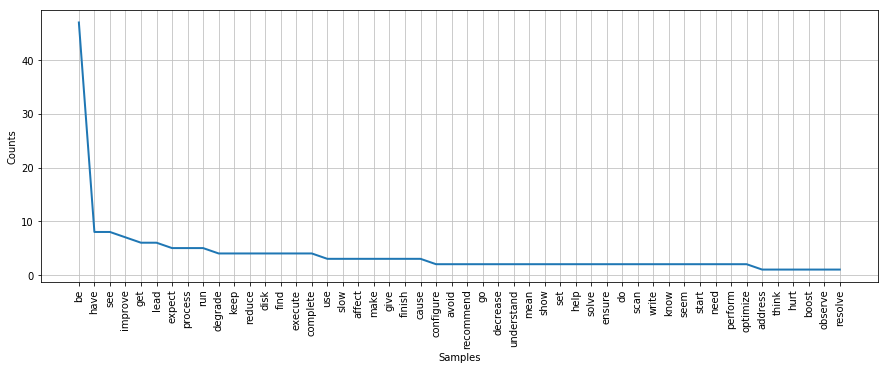

In [38]:
neg_vb = get_words_from_tag(neg_reviews_text, 'VB')
fdist_vb_neg = plot_common_words(neg_vb, useless_words)

## 7 Test the new vocabulary with TextBlob

### 7.1 Transform the CSV vocabulary to XML, this way the library will be able to read the data

In [39]:
vocabulary = pd.read_csv('data/PerformanceVocabulary2.csv')
vocabulary.head()

,wordnetid,word,pos,polarity,subjectivity,intensity,confidence,similar word,polarity of similar,subjectivity similar,intensity similar,proposed polarity,proposed subjectivity,intensity.1,synonym,antonym
0,n-05200169,ability,NN,#,#,#,#,able,0.5,0.5,1.0,0.3,0.2,1.0,#,#
1,n-05202497,capability,NN,#,#,#,#,capable,0.5,1.0,1.0,0.4,0.3,1.0,ability,#
2,n-05637558,skill,NN,#,#,#,#,skilled,0.5,0.5,1.0,0.3,0.3,1.0,ability,#
3,n-05153520,competence,NN,#,#,#,#,able,0.5,0.5,1.0,0.4,0.4,1.0,ability,#
4,n-05029706,strength,NN,#,#,#,#,strong,0.1,0.7,1.0,0.1,0.5,1.0,ability,#


In [40]:
def convert_csv_xml(df):
    text = ""
    for index, row in df.iterrows():

        descr = '<word form="%s" cornetto_synset_id="" wordnet_id="%s" pos="%s" sense="" polarity="%.2f" subjectivity="%.2f" intensity="1.0" confidence="1.0" />'
        wordnetid = row['wordnetid']
        if "#" in wordnetid:
            wordnetid = ''
        text += descr %(row['word'], wordnetid, row['pos'], row['proposed polarity'], row['proposed subjectivity']) + "\n"


    with open('performance_vocabulary2.xml', 'w') as f:
        f.write(text)

In [41]:
convert_csv_xml(vocabulary)

### 7.2 Some examples

In [42]:
TextBlob("MongoDB performance is acceptable, but not spectacular.").sentiment

Sentiment(polarity=-0.09999999999999999, subjectivity=0.45)

In [43]:
review = """print 15 records randomly from our huge databases. 
I ran the query about 1,000 times each for mysql and MongoDB and I am suprised that 
I do not notice a lot of difference in speed. Maybe MongoDB is 1.1 times faster. 
That's very disappointing. Is there something I am doing wrong? 
I know that my tests are not perfect but is MySQL on par with MongoDb when it 
comes to read intensive chores."""
TextBlob(review).sentiment

Sentiment(polarity=-0.06857142857142857, subjectivity=0.7157142857142856)

### 7.3 Evaluation of performance

#### 7.3.1 Definning the metrics

In [44]:
def display_evaluation_metrics(true_labels, predicted_labels, positive_class=1):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 2))
    print('Precision:', np.round(metrics.precision_score(true_labels, 
                                                         predicted_labels, 
                                                         pos_label=positive_class,
                                                         average='binary'), 2))
    print('Recall:', np.round(metrics.recall_score(true_labels,
                                                predicted_labels,
                                                pos_label=positive_class,
                                                  average='binary'), 2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, 
                                                 predicted_labels,
                                                 pos_label=positive_class,
                                                 average='binary'), 2))

In [45]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1, 0]):
    cm = metrics.confusion_matrix(y_true=true_labels, 
                                  y_pred=predicted_labels,
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm,
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes],
                                                  labels=[[0, 0], [0, 1]]),
                           index=pd.MultiIndex(levels=[['Actual:'],
                                                      classes],
                                               labels=[[0, 0], [0, 1]]))
    print(cm_frame)

In [46]:
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels,
                                           labels=classes)
    print(report)

In [47]:
def analyze_sentiment_pattern_lexicon(review, threshold=0.1, verbose=False):
    comment = TextBlob(review)
    sentiment_score = round(comment.sentiment.polarity, 2)
    sentiment_subjectivity = round(comment.sentiment.subjectivity, 2)
    if sentiment_score >= threshold:
        final_sentiment = 1
    else: 
        final_sentiment = 0
    
    if verbose:
        sentiment_frame = pd.DataFrame([[final_sentiment, sentiment_score, sentiment_subjectivity]], 
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                     ['Predicted Sentiment',
                                                                      'Polarity Score',
                                                                      'Subjectivity Score']],
                                                                      labels=[[0, 0, 0],
                                                                             [0, 1, 2]]))
        print("Calculated Sentiment: " + str(sentiment_score))
        print("Calculated Subjectivity: " + str(sentiment_subjectivity))
        print("Labeled as: " + str(final_sentiment))
        print(sentiment_frame)
    return final_sentiment

In [48]:
def evaluate_dataset(df):
    for index, review_sentiment in df.iterrows():
        print('Review:')
        print(review_sentiment['review'])
        print()
        if  review_sentiment['sentiment'] == 1:
            sentiment = 'Positive'
        elif review_sentiment['sentiment'] == 0:
            sentiment = 'Negative'
        print('Labeled Sentiment:' + sentiment)
        print()
        final_sentiment = analyze_sentiment_pattern_lexicon(review_sentiment['review'], threshold=0.15, verbose=True)
        print('-' * 60)

In [49]:
def show_classification_metrics(df):
    all_reviews = df['review']
    all_sentiments = df['sentiment']
    pattern_predictions = [analyze_sentiment_pattern_lexicon(review,
                                                         threshold=0.1, verbose=False)
                                                         for review in all_reviews]
    
    print('Performance metrics:')
    display_evaluation_metrics(true_labels=all_sentiments,
                               predicted_labels=pattern_predictions,
                               positive_class=1)
    print('Confusion Matrix')
    display_confusion_matrix(true_labels=all_sentiments,
                             predicted_labels=pattern_predictions,
                             classes=[0, 1])

    print('\nClassification report:')
    display_classification_report(true_labels=all_sentiments,
                                  predicted_labels=pattern_predictions,
                                  classes=[0, 1])

### 7.3.2 Importing the test dataset

In [50]:
test_data = pd.read_csv("data/TestVocabulary.csv")
test_data.head()

,review,sentiment
0,MongoDB is a fast NoSQL database. Unfortunatel...,0
1,I wanted to compare speed with MongoDB and I r...,0
2,MongoDB is not magically faster.,0
3,MongoDB performance is going to be severely im...,0
4,MongoDB’s performance is better than that of M...,1


### 7.3.3 Check the performance of the dataset

In [51]:
evaluate_dataset(test_data)

Review:
MongoDB is a fast NoSQL database. Unfortunately, it’s not a cure for all your performance woes, and a single complex query can bring your code grinding to a halt. I recently suffered this fate, and it can be difficult to know where to look when your application suddenly becomes unstable.

Labeled Sentiment:Negative

Calculated Sentiment: -0.05
Calculated Subjectivity: 0.6
Labeled as: 0
     SENTIMENT STATS:                                  
  Predicted Sentiment Polarity Score Subjectivity Score
0                   0          -0.05                0.6
------------------------------------------------------------
Review:
I wanted to compare speed with MongoDB and I ran a test which would get and print 15 records randomly from our huge databases. I ran the query about 1,000 times each for mysql and MongoDB and I am suprised that I do not notice a lot of difference in speed. Maybe MongoDB is 1.1 times faster. That's very disappointing. Is there something I am doing wrong? I know tha

In [52]:
show_classification_metrics(dataset)

Performance metrics:
Accuracy: 0.77
Precision: 0.73
Recall: 0.84
F1 Score: 0.78
Confusion Matrix
          Predicted:     
                   0    1
Actual: 0        160   65
        1         34  180

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.71      0.76       225
          1       0.73      0.84      0.78       214

avg / total       0.78      0.77      0.77       439



In [53]:
show_classification_metrics(test_data)

Performance metrics:
Accuracy: 0.81
Precision: 0.85
Recall: 0.8
F1 Score: 0.83
Confusion Matrix
          Predicted:    
                   0   1
Actual: 0         36   8
        1         11  45

Classification report:
             precision    recall  f1-score   support

          0       0.77      0.82      0.79        44
          1       0.85      0.80      0.83        56

avg / total       0.81      0.81      0.81       100



### 7.3.4 We get an accuracy of 0.80, check if we can improve it with new grammar rules

#### 7.3.4.1 Definning neutral reviews

This sentence: "MongoDB's performance is derived in part from advanced stochastic branching techniques." Doesn't  expose sentiment. So we can say that the words that doesn't contain some adverb intensifier are neutral. Some of the sentences with show error in the reviews are:

* MongoDB performance is not any longer affected by indexing and no data loss will occur in MongoDB
* CouchDB's performance is not as easy to google as I hoped
* CouchDB’s performance is already quite decent and it’s not even been tuned, so I’ve never attempted to benchmark it’s behavior.
* CouchDB. Performance is lousy of course, but I did it as a proof of concept, and it works ok
* CouchDB performance is not as good as it occured to me at the beginning and it is also difficult to implement the advanced visualizer features
* Neo4j's performance is good overall though, especially when compared to other dedicated graph databases.
* Neo4j's performance is dramatically better for connected data sets – often the difference between something being possible and not possible.
* Neo4J's performance is more negatively affected by the large graphs than imGraph's performance.
* Redis’ performance is quantifiable and measurable by tracking several key metrics, and by monitoring these you can gain insight into how well your database is performing.
* Although the Redis performance is better in a lot of cases, it is not the Holy Grail.
* Redis performance is never affected
* Redis performance isconsidered a non-issue
* MySQL Performance is not yet there ;-))


#### 4.3.4.2 Rule 1: Handle negation

One way is to prepend NOT_ to every word between the negation and the beginning of the next punctuation character.

In [54]:
class Sentinel:
    
    def __init__(self, sentence):
        self.sentence = sentence
        self.negation_words = ["n't", 'not', 'never', 'no']
        self.punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        self.words = word_tokenize(sentence)
        
    def _find_negated_word(self, words):
        indexes = []
        for i, word in enumerate(words):
            if word in self.negation_words:
                indexes.append(i)
        return indexes
    
    def _mark_negated_scope(self, words, neg_idxs):
        punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        for neg in neg_idxs:
            for i in range(neg + 1, len(words)):
                if words[i] in punctuation_characters:
                    break
                words[i] = 'NOT_' + words[i]
        return words
    
    def _calculate_negated_polarity(self, sentence):
        words = word_tokenize(sentence)
        ind = self._find_negated_word(words)
        marked_words = self._mark_negated_scope(words, ind)
        polarities = []
        for word in marked_words:
            if 'NOT_' in word:
                word = word.replace('NOT_', '')
                polarity = TextBlob(word).sentiment.polarity * -1
            elif word in self.negation_words:
                polarity = 0.0
            else:
                polarity = TextBlob(word).sentiment.polarity
            polarities.append((word, polarity))
        return polarities
    
    def calculate_sentence_polarity(self):
        polarities = self._calculate_negated_polarity(self.sentence)
        count = len([polarity for word, polarity in polarities if polarity != 0])
        total = sum([p for w, p in polarities])
        if count == 0:
            sentiment = 0.0
        else:
            sentiment = total/count
        return (sentiment, TextBlob(self.sentence).sentiment.subjectivity)

##### 4.3.4.2 Examples

In [55]:
sentinel = Sentinel("CouchDB’s performance is already quite decent and it’s not even been tuned, so I’ve never attempted to benchmark it’s behavior.")
print("Polarity: " + str(sentinel.calculate_sentence_polarity()))
sentinel.sentence = "MongoDB performance is not any longer affected by indexing and no data loss will occur in MongoDB"
print("Polarity: " + str(sentinel.calculate_sentence_polarity()))

Polarity: (0.16666666666666666, 0.3333333333333333)
Polarity: (0.25, 0.15)


#### 4.3.4.3 Evaluation

In [56]:
def analyze_sentiment_pattern_lexicon(review, threshold=0.1, verbose=False):
    comment = Sentinel(review)
    sentiment, subjectivity  = comment.calculate_sentence_polarity()
    sentiment = round(sentiment, 2)
    subjectivity = round(subjectivity, 2)
    if sentiment >= threshold:
        label = 1
    else: 
        label = 0
    
    if verbose:
        sentiment_frame = pd.DataFrame([[label, sentiment, subjectivity]], 
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                     ['Predicted Sentiment',
                                                                      'Polarity Score',
                                                                      'Subjectivity Score']],
                                                                      labels=[[0, 0, 0],
                                                                             [0, 1, 2]]))
        print("Calculated Sentiment: " + str(sentiment))
        print("Calculated Subjectivity: " + str(subjectivity))
        print("Labeled as: " + str(label))
        print(sentiment_frame)
    return label

In [57]:
evaluate_dataset(test_data)

Review:
MongoDB is a fast NoSQL database. Unfortunately, it’s not a cure for all your performance woes, and a single complex query can bring your code grinding to a halt. I recently suffered this fate, and it can be difficult to know where to look when your application suddenly becomes unstable.

Labeled Sentiment:Negative

Calculated Sentiment: -0.2
Calculated Subjectivity: 0.6
Labeled as: 0
     SENTIMENT STATS:                                  
  Predicted Sentiment Polarity Score Subjectivity Score
0                   0           -0.2                0.6
------------------------------------------------------------
Review:
I wanted to compare speed with MongoDB and I ran a test which would get and print 15 records randomly from our huge databases. I ran the query about 1,000 times each for mysql and MongoDB and I am suprised that I do not notice a lot of difference in speed. Maybe MongoDB is 1.1 times faster. That's very disappointing. Is there something I am doing wrong? I know that

In [58]:
show_classification_metrics(dataset)

Performance metrics:
Accuracy: 0.79
Precision: 0.74
Recall: 0.88
F1 Score: 0.81
Confusion Matrix
          Predicted:     
                   0    1
Actual: 0        160   65
        1         26  188

Classification report:
             precision    recall  f1-score   support

          0       0.86      0.71      0.78       225
          1       0.74      0.88      0.81       214

avg / total       0.80      0.79      0.79       439



In [59]:
show_classification_metrics(test_data)

Performance metrics:
Accuracy: 0.87
Precision: 0.92
Recall: 0.84
F1 Score: 0.88
Confusion Matrix
          Predicted:    
                   0   1
Actual: 0         40   4
        1          9  47

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.91      0.86        44
          1       0.92      0.84      0.88        56

avg / total       0.88      0.87      0.87       100



#### 7.3.4.4 Rule 2: Adjective Intensifiers

There are some words that can be used to intensify adjectives
such as, „very‟ „utterly‟ „totally‟ „completely‟ „absolutely‟
„entirely‟ „really‟.

In [60]:
class Sentinel:
    
    def __init__(self, sentence):
        self.sentence = sentence
        self.negation_words = ["n't", 'not', 'never', 'no']
        self.punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        self.strong_intensifiers = ['exceedingly', 'extremely', 'broadly', 'intensely',
         'deeply', 'generally', 'rapidly', 'tremendously', 'potentially', 'terribly',
         'vastly', 'very', 'highly', 'fatally', 'enormously', 'inmmensely', 'utterly',
         'totally', 'completely', 'absolutely', 'entirely', 'really', 'fully', 'widely',
         'truly', 'dramatically', 'significantly', 'exceptionally', 'particularly'
        ]
        self.weak_intensifiers = ['barely', 'scarcely', 'roughly', 'unfortunately', 
            'hardly', 'quietly', 'slightly', 'weakly' 
        ]
        self.words = word_tokenize(sentence)
        
    
    def _preparate_words(self, words):
        tagged_words = []
        for word in words:
            t = (word, )
            tagged_words.append(t)
        return tagged_words
        
    def _find_negated_word(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.negation_words:
                indexes.append(i)
        return indexes
    
    def _mark_negated_scope(self, words, neg_idxs):
        punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        for neg in neg_idxs:
            for i in range(neg + 1, len(words)):
                word = words[i][0]
                if word in punctuation_characters:
                    break
                words[i] = words[i] + ('NOT_',)
        return words
    
    
    def _find_strong_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.strong_intensifiers:
                indexes.append(i)
        return indexes
    
    def _find_weak_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.weak_intensifiers:
                indexes.append(i)
        return indexes
    
    def _mark_intensifier_scope(self, words, str_idxs, tag):
        for i in str_idxs:
            widx = i + 1
            try:
                words[widx] = words[widx] + (tag,)
            except IndexError:
                continue
        return words
    
                        
    def is_useless(self, word):
        useless = word in self.negation_words or word in self.strong_intensifiers
        return useless
                
   

    def _calculate_polarity(self, sentence):
        words = word_tokenize(sentence)
        words = self._preparate_words(words)
        neg_idxs = self._find_negated_word(words)
        str_idxs = self._find_strong_intensifier(words)
        words = self._mark_negated_scope(words, neg_idxs)
        words = self._mark_intensifier_scope(words, str_idxs, 'STRONG_')
        words = self._mark_intensifier_scope(words, str_idxs, 'WEAK_')
        polarities = []
        for cloud_w in words:
            word = cloud_w[0]
            tags = cloud_w[1:]
            polarity = TextBlob(word).sentiment.polarity
            for tag in tags:
                if 'NOT_' in tag:
                    polarity = polarity * -1
                elif 'STRONG_' in tag:
                    if polarity > 0 : polarity += 0.3
                    else: polarity -= 0.3
                elif 'WEAK_' in tag:
                    if polarity > 0 : polarity -= 0.3
                    else: polarity += 0.3
            if self.is_useless(word): polarity = 0.0
            if polarity > 1: polarity = 1
            if polarity < -1: polarity = -1
            polarities.append(polarity)
        return polarities
            

    def calculate_sentence_polarity(self):
        polarities = self._calculate_polarity(self.sentence)
        count = len([polarity for polarity in polarities if polarity != 0])
        total = sum([p for p in polarities])
        if count == 0:
            sentiment = 0.0
        else:
            sentiment = total/count
        return (sentiment, TextBlob(self.sentence).sentiment.subjectivity)

In [61]:
review = "The food smelled really disgusting."
sentinel = Sentinel(review)
sentinel.calculate_sentence_polarity()

(-1.0, 1.0)

#### 4.3.4.4 Evaluation

In [62]:
show_classification_metrics(dataset)

Performance metrics:
Accuracy: 0.8
Precision: 0.75
Recall: 0.88
F1 Score: 0.81
Confusion Matrix
          Predicted:     
                   0    1
Actual: 0        163   62
        1         26  188

Classification report:
             precision    recall  f1-score   support

          0       0.86      0.72      0.79       225
          1       0.75      0.88      0.81       214

avg / total       0.81      0.80      0.80       439



In [63]:
show_classification_metrics(test_data)

Performance metrics:
Accuracy: 0.86
Precision: 0.92
Recall: 0.82
F1 Score: 0.87
Confusion Matrix
          Predicted:    
                   0   1
Actual: 0         40   4
        1         10  46

Classification report:
             precision    recall  f1-score   support

          0       0.80      0.91      0.85        44
          1       0.92      0.82      0.87        56

avg / total       0.87      0.86      0.86       100



#### 7.3.4.5 Rule 3: Uncertainty or Suggestion

Many a times, reviewers make a suggestion on how a
particular feature of the entity or product or service has to be
improved, the polarity of such sentences should rather be
neutral than positive or negative.

In [64]:
class Sentinel:
    
    def __init__(self, sentence):
        self.sentence = sentence
        self.negation_words = ["n't", 'not', 'never', 'no']
        self.punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        self.strong_intensifiers = ['exceedingly', 'extremely', 'broadly', 'intensely',
         'deeply', 'generally', 'rapidly', 'tremendously', 'potentially', 'terribly',
         'vastly', 'very', 'highly', 'fatally', 'enormously', 'inmmensely', 'utterly',
         'totally', 'completely', 'absolutely', 'entirely', 'really', 'fully', 'widely',
         'truly', 'dramatically', 'significantly', 'exceptionally', 'particularly'
        ]
        self.weak_intensifiers = ['barely', 'scarcely', 'roughly', 'unfortunately', 
            'hardly', 'quietly', 'slightly', 'weakly' 
        ]
        self.words = word_tokenize(sentence)
        
    
    def _preparate_words(self, words):
        tagged_words = []
        for word in words:
            t = (word, )
            tagged_words.append(t)
        return tagged_words
        
    def _find_negated_word(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.negation_words:
                indexes.append(i)
        return indexes
    
    def _mark_negated_scope(self, words, neg_idxs):
        punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        for neg in neg_idxs:
            for i in range(neg + 1, len(words)):
                word = words[i][0]
                if word in punctuation_characters:
                    break
                words[i] = words[i] + ('NOT_',)
        return words
    
    
    def _find_strong_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.strong_intensifiers:
                indexes.append(i)
        return indexes
    
    def _find_weak_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.weak_intensifiers:
                indexes.append(i)
        return indexes
    
    def _mark_intensifier_scope(self, words, str_idxs, tag):
        for i in str_idxs:
            widx = i + 1
            try:
                words[widx] = words[widx] + (tag,)
            except IndexError:
                continue
        return words
    
    
    def _find_uncertainty(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word.lower() == 'be':
                indexes.append(i)
        return indexes
    
    
    def _mark_uncertainty_scope(self, words, idxs):
        uncert_tags = ['JJR', 'JJ', 'RBR']
        for uncert in idxs:
            try:
                for i in range(uncert + 1, len(words)):
                    word = words[i][0]
                    tag = TextBlob(word, pos_tagger=PatternTagger()).tags[0][1]
                    if tag in uncert_tags:
                        words[i] += ('UNCERT_',)
                        break
            except:
                continue
        return words
    
                        
    def is_useless(self, word):
        useless = word in self.negation_words or word in self.strong_intensifiers
        return useless
                
   

    def _calculate_polarity(self, sentence):
        words = word_tokenize(sentence)
        words = self._preparate_words(words)
        neg_idxs = self._find_negated_word(words)
        str_idxs = self._find_strong_intensifier(words)
        weak_idxs = self._find_weak_intensifier(words)
        unc_idx = self._find_uncertainty(words)
        words = self._mark_negated_scope(words, neg_idxs)
        words = self._mark_intensifier_scope(words, str_idxs, 'STRONG_')
        words = self._mark_intensifier_scope(words, weak_idxs, 'WEAK_')
        words = self._mark_uncertainty_scope(words, unc_idx)
        polarities = []
        for cloud_w in words:
            word = cloud_w[0]
            tags = cloud_w[1:]
            polarity = TextBlob(word).sentiment.polarity
            for tag in tags:
                if 'NOT_' in tag:
                    polarity = polarity * -1
                elif 'STRONG_' in tag:
                    if polarity > 0 : polarity += 0.3
                    else: polarity -= 0.3
                elif 'WEAK_' in tag:
                    if polarity > 0 : polarity -= 0.3
                    else: polarity += 0.3
                elif 'UNCERT_' in tag:
                    polarity = 0.0
            if self.is_useless(word): polarity = 0.0
            if polarity > 1: polarity = 1
            if polarity < -1: polarity = -1
            polarities.append(polarity)
        return polarities
            

    def calculate_sentence_polarity(self):
        polarities = self._calculate_polarity(self.sentence)
        count = len([polarity for polarity in polarities if polarity != 0])
        total = sum([p for p in polarities])
        if count == 0:
            sentiment = 0.0
        else:
            sentiment = total/count
        return (sentiment, TextBlob(self.sentence).sentiment.subjectivity)

In [65]:
review = """The product might be expensive"""
sentinel = Sentinel(review)
words = word_tokenize(review)
words2 = sentinel._preparate_words(words)
idx = sentinel._find_uncertainty(words2)
sentinel.calculate_sentence_polarity()

(0.0, 0.7)

#### 4.3.4.5 Evaluation

In [66]:
show_classification_metrics(dataset)

Performance metrics:
Accuracy: 0.79
Precision: 0.75
Recall: 0.87
F1 Score: 0.81
Confusion Matrix
          Predicted:     
                   0    1
Actual: 0        163   62
        1         28  186

Classification report:
             precision    recall  f1-score   support

          0       0.85      0.72      0.78       225
          1       0.75      0.87      0.81       214

avg / total       0.80      0.79      0.79       439



In [67]:
show_classification_metrics(test_data)

Performance metrics:
Accuracy: 0.86
Precision: 0.94
Recall: 0.8
F1 Score: 0.87
Confusion Matrix
          Predicted:    
                   0   1
Actual: 0         41   3
        1         11  45

Classification report:
             precision    recall  f1-score   support

          0       0.79      0.93      0.85        44
          1       0.94      0.80      0.87        56

avg / total       0.87      0.86      0.86       100



#### 7.3.4.6 Rule 4: Identify “however” and “although”

 ##### When the sentence start with altough:
 * The scope of althoug finish after "," OR if cannot find ",", finish when we found "PRP" or a "NNP" or "NNPS".
 * Neutralize the polarity of the sentence to 0.

##### When the sentence has although in the middle
* The scope of although will be before some punctuation and after the same word.
* Make the polarity of the chunk 0.

In [68]:
class Sentinel:
    
    def __init__(self, sentence):
        self.sentence = sentence
        self.negation_words = ["n't", 'not', 'never', 'no']
        self.punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        self.strong_intensifiers = ['exceedingly', 'extremely', 'broadly', 'intensely',
         'deeply', 'generally', 'rapidly', 'tremendously', 'potentially', 'terribly',
         'vastly', 'very', 'highly', 'fatally', 'enormously', 'inmmensely', 'utterly',
         'totally', 'completely', 'absolutely', 'entirely', 'really', 'fully', 'widely',
         'truly', 'dramatically', 'significantly', 'exceptionally', 'particularly'
        ]
        self.weak_intensifiers = ['barely', 'scarcely', 'roughly', 'unfortunately', 
            'hardly', 'quietly', 'slightly', 'weakly' 
        ]
        self.words = word_tokenize(sentence)
        
    
    def _preparate_words(self, words):
        tagged_words = []
        for word in words:
            t = (word, )
            tagged_words.append(t)
        return tagged_words
        
    def _find_negated_word(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.negation_words:
                indexes.append(i)
        return indexes
    
    def _mark_negated_scope(self, words, neg_idxs):
        punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        for neg in neg_idxs:
            for i in range(neg + 1, len(words)):
                word = words[i][0]
                if word in punctuation_characters:
                    break
                words[i] = words[i] + ('NOT_',)
        return words
    
    
    def _find_strong_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.strong_intensifiers:
                indexes.append(i)
        return indexes
    
    def _find_weak_intensifier(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word in self.weak_intensifiers:
                indexes.append(i)
        return indexes
    
    def _mark_intensifier_scope(self, words, str_idxs, tag):
        for i in str_idxs:
            widx = i + 1
            try:
                words[widx] = words[widx] + (tag,)
            except IndexError:
                continue
        return words
    
    
    def _find_uncertainty(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word.lower() == 'be':
                indexes.append(i)
        return indexes
    
    
    def _mark_uncertainty_scope(self, words, idxs):
        uncert_tags = ['JJR', 'JJ', 'RBR']
        for uncert in idxs:
            try:
                for i in range(uncert + 1, len(words)):
                    word = words[i][0]
                    tag = TextBlob(word, pos_tagger=PatternTagger()).tags[0][1]
                    if tag in uncert_tags:
                        words[i] += ('UNCERT_',)
                        break
            except:
                continue
        return words
    
    
    def _find_althoug(self, words):
        indexes = []
        for i, cloud_w in enumerate(words):
            word = cloud_w[0]
            if word.lower() == 'although':
                indexes.append(i)
        return indexes
    
    def _mark_althoug_scope(self, words, idxs):
        punctuation_characters = ['.', ',', ';', 'but', 'and', 'by']
        tag_limiters = ['PRP']
        for idx in idxs:
            for i in range(idx + 1, len(words)):
                word = words[i][0]
                if word in punctuation_characters:
                    break
                tag = TextBlob(word, pos_tagger=PatternTagger()).tags[0][1]
                if tag in tag_limiters:
                    break
                words[i] += ('ALTH_',)
        return words
    
                        
    def is_useless(self, word):
        useless = word in self.negation_words or word in self.strong_intensifiers
        return useless
                
   

    def _calculate_polarity(self, sentence):
        words = word_tokenize(sentence)
        words = self._preparate_words(words)
        neg_idxs = self._find_negated_word(words)
        str_idxs = self._find_strong_intensifier(words)
        weak_idxs = self._find_weak_intensifier(words)
        unc_idx = self._find_uncertainty(words)
        alth_idx = self._find_althoug(words)
        words = self._mark_negated_scope(words, neg_idxs)
        words = self._mark_intensifier_scope(words, str_idxs, 'STRONG_')
        words = self._mark_intensifier_scope(words, weak_idxs, 'WEAK_')
        words = self._mark_uncertainty_scope(words, unc_idx)
        words = self._mark_althoug_scope(words, alth_idx)
        polarities = []
        for cloud_w in words:
            word = cloud_w[0]
            tags = cloud_w[1:]
            polarity = TextBlob(word).sentiment.polarity
            for tag in tags:
                if 'NOT_' in tag:
                    polarity = polarity * -1
                elif 'STRONG_' in tag:
                    if polarity > 0 : polarity += 0.3
                    else: polarity -= 0.3
                elif 'WEAK_' in tag:
                    if polarity > 0 : polarity -= 0.3
                    else: polarity += 0.3
                elif 'UNCERT_' in tag:
                    polarity = 0.0
                elif 'ALTH_' in tag:
                    polarity = 0.0
            if self.is_useless(word): polarity = 0.0
            if polarity > 1: polarity = 1
            if polarity < -1: polarity = -1
            polarities.append(polarity)
        return polarities
            

    def calculate_sentence_polarity(self):
        polarities = self._calculate_polarity(self.sentence)
        count = len([polarity for polarity in polarities if polarity != 0])
        total = sum([p for p in polarities])
        if count == 0:
            sentiment = 0.0
        else:
            sentiment = total/count
        return (sentiment, TextBlob(self.sentence).sentiment.subjectivity)

In [69]:
review = """Although the printer is efficient it is very expensive"""
sentinel = Sentinel(review)
sentinel.calculate_sentence_polarity()

(-0.8, 0.955)

In [70]:
show_classification_metrics(dataset)

Performance metrics:
Accuracy: 0.8
Precision: 0.75
Recall: 0.87
F1 Score: 0.81
Confusion Matrix
          Predicted:     
                   0    1
Actual: 0        164   61
        1         28  186

Classification report:
             precision    recall  f1-score   support

          0       0.85      0.73      0.79       225
          1       0.75      0.87      0.81       214

avg / total       0.80      0.80      0.80       439



In [71]:
show_classification_metrics(test_data)

Performance metrics:
Accuracy: 0.87
Precision: 0.96
Recall: 0.8
F1 Score: 0.87
Confusion Matrix
          Predicted:    
                   0   1
Actual: 0         42   2
        1         11  45

Classification report:
             precision    recall  f1-score   support

          0       0.79      0.95      0.87        44
          1       0.96      0.80      0.87        56

avg / total       0.88      0.87      0.87       100



In [72]:
evaluate_dataset(test_data)

Review:
MongoDB is a fast NoSQL database. Unfortunately, it’s not a cure for all your performance woes, and a single complex query can bring your code grinding to a halt. I recently suffered this fate, and it can be difficult to know where to look when your application suddenly becomes unstable.

Labeled Sentiment:Negative

Calculated Sentiment: -0.13
Calculated Subjectivity: 0.6
Labeled as: 0
     SENTIMENT STATS:                                  
  Predicted Sentiment Polarity Score Subjectivity Score
0                   0          -0.13                0.6
------------------------------------------------------------
Review:
I wanted to compare speed with MongoDB and I ran a test which would get and print 15 records randomly from our huge databases. I ran the query about 1,000 times each for mysql and MongoDB and I am suprised that I do not notice a lot of difference in speed. Maybe MongoDB is 1.1 times faster. That's very disappointing. Is there something I am doing wrong? I know tha

In [73]:
evaluate_dataset(dataset)

Review:
fast write and read performance, and delivering true linear scale performance in a masterless, scale-out design, bests its top NoSQL database rivals in many use cases.

Labeled Sentiment:Positive

Calculated Sentiment: 0.45
Calculated Subjectivity: 0.41
Labeled as: 1
     SENTIMENT STATS:                                  
  Predicted Sentiment Polarity Score Subjectivity Score
0                   1           0.45               0.41
------------------------------------------------------------
Review:
delivers higher performance under heavy workloads

Labeled Sentiment:Positive

Calculated Sentiment: 0.02
Calculated Subjectivity: 0.5
Labeled as: 0
     SENTIMENT STATS:                                  
  Predicted Sentiment Polarity Score Subjectivity Score
0                   0           0.02                0.5
------------------------------------------------------------
Review:
presented relatively good performance in INSERT-only

Labeled Sentiment:Positive

Calculated Sentimen

In [79]:
review = """This is probably my favorite database to work with currently. Real time, relational document storage. Best of three worlds.
"""
sentinel = Sentinel(review)
sentinel.calculate_sentence_polarity()

(0.5666666666666667, 0.5333333333333333)

In [75]:
from textblob import TextBlob
import requests
from urllib import parse
import re


In [76]:
def cleanhtml(raw_html):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', raw_html)
        return cleantext

In [174]:
endpoint = 'https://hn.algolia.com/api/v1/search?query=neo4j+performance+is&tags=comment&hitsPerPage=50'
response = requests.get(endpoint)
data = response.json()

In [175]:
comments = data['hits']

In [176]:
comments = [comment['comment_text'] for comment in comments]
clean_comments = []
for comment in comments:
    body = cleanhtml(comment)
    body_clean = re.sub(r'&#x\d+;', "'", body)
    clean_comments.append(body_clean)
    if len(body_clean) < 450:
        print(body_clean)
        print('*'*30)
        print(Sentinel(body_clean).calculate_sentence_polarity())

Some people build &quot;graph databases&quot; on top of storage backends that are ill suited for such workloads. e.g you can build a &quot;graph database&quot; (or K&#x2F;V store) on top of MySQL, but the performance is terrible - http:&#x2F;&#x2F;java.dzone.com&#x2F;articles&#x2F;mysql-vs-neo4j-large-scalea &quot;native graph database&quot; is one that is actually designed for the task.
******************************
(-0.125, 0.6)
It's straightforward to build a graph database using LMDB, the performance is excellent, and it supports transactions, online backups, etc.If you don't mind Java, Neo4J is another good choice.
******************************
(0.6916666666666668, 0.6583333333333333)
That's sad. I was a big fan of Titan DB and we use it extensively.Really sad to see it go. Now we'll have to find another solution, e.g. migrate to Neo4j, although we rely heavily on the scalability of Titan DB.I guess now is the time to test Neo4j's cluster performance.Any other alternatives out t

In [133]:
comment = cleanhtml(comments[0])
comment

"You know, I didn't think about how similar Redis and Mongo are at the core when I first read your comment. The first thing that jumped out at me was the large set of disparities.Thanks for that explanation. I agree that Mongo seems to have over-promised and under-delivered and that you do have to really craft your access pattern. I'm not a heavy MongoDB user, but from reading the docs and playing around, I was already under the impression that the performance of MongoDB is entirely up to me and that I would need a lot of understanding to get the beast working well at scale.So, it's a tough call for me to say whether they over-promised or not, but like I said...I'm not a heavy user. I just read a lot. I do think it is easy to be deceived by Mongo's apparent simplicity (ie - usage of JSON, Javascript, schema-lessness, etc).EDIT: zzzeek made a good point below about spending time in a low-key mode before really selling the huge feature-set, which convinced me, so I think you're right. I 

In [160]:
review = """It would be surprising if, for data with a consistent, predictable structure, MongoDB had the best, most consistent, and most predictable performance. MongoDB's raison d'etre is that data doesn't always have consistent, predictable structures.That said, there's cool stuff out there in the Mongo ecosystem. E.g., TokuMX is a whole new Mongo storage engine."""
len(review)

356

In [182]:
payload = {'text': "Neo4j is limited to the ram available on a single machine. Cassandra can scale across many machines. You won't get nearly the same performance though as you would with neo4j."}
r = requests.post('http://text-processing.com/api/sentiment/', data=payload)
r = r.json()

In [185]:
r

{'label': 'neg',
 'probability': {'neg': 0.5037916402693454,
  'neutral': 0.2561138305289527,
  'pos': 0.49620835973065464}}